In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from tensorflow import keras
import pandas as pd



print(tf.__version__)

2.7.0


In [ ]:
# Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images[0:20000]
train_labels = train_labels[0:20000]

In [ ]:
print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Type of the training images: {type(train_images)}")

Training images shape: (20000, 28, 28)
Testing images shape: (10000, 28, 28)
Type of the training images: <class 'numpy.ndarray'>


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

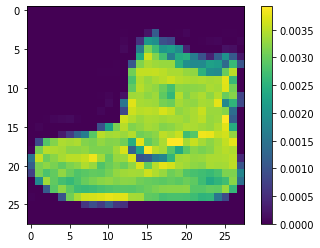

In [ ]:
# Print the iamges
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

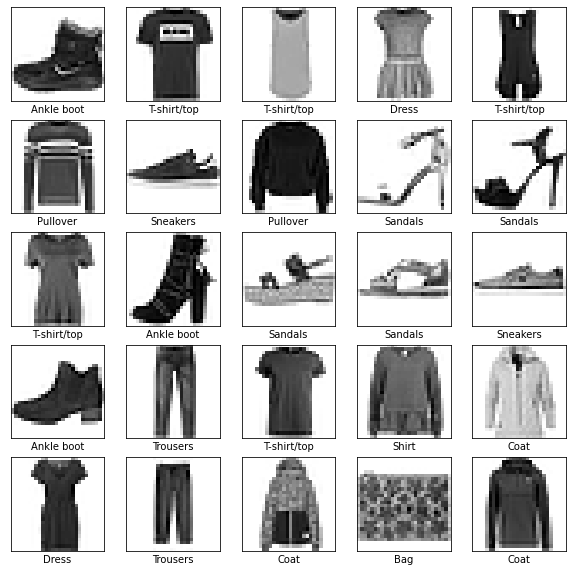

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)    
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(10, activation ='sigmoid')    
])
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               65664     
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [ ]:
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 7s 9ms/step - loss: 2.3027 - accuracy: 0.1035
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 2.2859 - accuracy: 0.1256
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 2.1420 - accuracy: 0.1585
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 2.1193 - accuracy: 0.1622
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 2.2227 - accuracy: 0.1377
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 2.2130 - accuracy: 0.1426
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 2.1350 - accuracy: 0.1633
Epoch 8/10
625/625 [==============================] - 6s 9ms/step - loss: 2.1157 - accuracy: 0.1637
Epoch 9/10
625/625 [==============================] - 6s 9ms/step - loss: 2.3080 - accuracy: 0.1009
Epoch 10/10
625/625 [==============================] - 6s 9ms/step - loss: 2.3051 - accuracy: 0.1002
313/3